In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
df = pd.read_csv('responses.csv')

df = df.iloc[:, 74:78]
df = df.rename(columns={'74. How many hours do you play video games in an average week? (PC, console, phone...)': 'HourPlayed', '75. How many hours do you spend watching gaming streams in a week?': 'HourWatched', '76. What genre of games do you play? (Select all that apply)': 'Genre', '77. What is the name of the game you play most?': 'PlayMost'})
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(to_replace=r'[^\d.]+', value='', regex=True)
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(to_replace='', value=0)
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(np.nan, 0)
df.iloc[:, 2:3] = df.iloc[:, 2:3].fillna('None')

# df = df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'77. What is the name of the game you play most?']
# df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'75. How many hours do you spend watching gaming streams in a week?'] = df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'75. How many hours do you spend watching gaming streams in a week?'].replace(to_replace=r'[^\d.]+', value='', regex=True)
# df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'75. How many hours do you spend watching gaming streams in a week?'] = df.loc[:, '74. How many hours do you play video games in an average week? (PC, console, phone...)':'75. How many hours do you spend watching gaming streams in a week?'].replace(np.nan, 0)

df.head(20)

,HourPlayed,HourWatched,Genre,PlayMost
0,15,10,"FPS, Fighting Games, Gatcha, Single Player Gam...",APEX LEGENDS
1,0,0,None,NaN
2,20,0,"Gatcha, Single Player Games, RTS, Phone Games",Azur Lane
3,20,8,"FPS, Fighting Games, Gatcha, Single Player Gam...",Tower of Fantasy
4,0,0,None,NaN
5,0,0,None,NaN
6,0,0,None,Na
7,3,0,MOBA,League of Legends
8,0,0,Phone Games,Wordle
9,5,0,Phone Games,Sumikko Farm


In [5]:
hour_play = df.drop(df[df.HourPlayed == 0].index)
fig = px.histogram(hour_play, x='HourPlayed', nbins=60)
fig.show()

In [6]:
violin = df.drop(df[df.HourPlayed == 0].index)
fig = px.violin(violin, y='HourPlayed', box=True, points='all')
fig.show()

In [7]:
hour_watch = df.drop(df[df.HourWatched == 0].index)
fig = px.histogram(hour_watch, x='HourWatched', nbins=30)
fig.show()

In [8]:
violin = df.drop(df[df.HourWatched == 0].index)
fig = px.violin(violin, y='HourWatched', box=True, points='all')
fig.show()

<AxesSubplot:xlabel='HourPlayed', ylabel='HourWatched'>

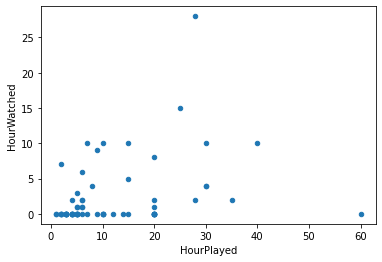

In [9]:

df['HourPlayed'] = df['HourPlayed'].astype(float)
df['HourWatched'] = df['HourWatched'].astype(float)
df = df.drop(df[df.HourPlayed == 0].index)
df.plot.scatter(x="HourPlayed", y="HourWatched")

<AxesSubplot:>

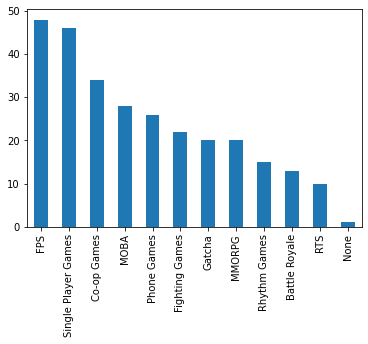

In [10]:
#df['Genre'] = df['Genre'].astype(str)
#df['Genre'] = df['Genre'].str.split(', ')
#genre_count = df['Genre'].explode().value_counts()
genre_count = df['Genre'].astype(str).str.split(', ').explode().value_counts()
genre_count.plot(kind='bar')